In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "PUR"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/baseline

Average verified rate: 0.9290939173075634

Average of error rates: 0.07389259368545294

Total token count: 6682304



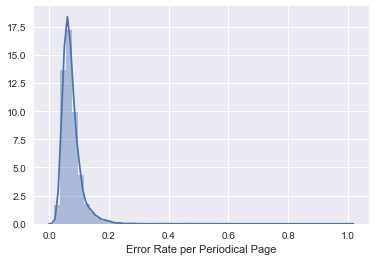

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 500 )

[('e', 15963),
 ('w', 14843),
 ('-', 10838),
 ('m', 10541),
 ('g', 10420),
 ('f', 6978),
 ('r', 6442),
 ('ñ', 6315),
 ('d', 6291),
 ('con-', 5874),
 ('re-', 5622),
 ("'", 4719),
 ('in-', 4451),
 ('t', 4226),
 ('tion', 3827),
 ('n', 3009),
 ('be-', 2880),
 ('ence', 2369),
 ('de-', 2339),
 ('ex-', 2281),
 ('¥', 2248),
 ('com-', 2163),
 ('ference', 2027),
 (')', 1987),
 ('confer-', 1976),
 ('en-', 1975),
 ('ment', 1786),
 ('ad-', 1722),
 ('meet-', 1454),
 ('th', 1448),
 ('mis-', 1433),
 ('un-', 1349),
 ('at-', 1245),
 ('ac-', 1172),
 ('tions', 1143),
 ('*', 1126),
 ('peo-', 1121),
 ('sab-', 1093),
 ('an-', 1080),
 ('ple', 1075),
 ('ers', 1072),
 ('pre-', 1061),
 ('ber', 1033),
 ('pro-', 1030),
 ('_', 1026),
 ('dis-', 1002),
 ('per-', 952),
 ('im-', 929),
 ('ap-', 904),
 ('mem-', 892),
 ('sionary', 876),
 ('(', 874),
 ('pa-', 846),
 ('cali-', 828),
 ('fornia', 804),
 ('__', 786),
 ('or-', 779),
 ('x', 773),
 ('inter-', 763),
 ('camp-', 759),
 ('ary', 738),
 ('col-', 710),
 ('fol-', 709),
 

## Review Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:100]

[('ñ', 6315),
 ('¥', 2248),
 (')', 1987),
 ('*', 1126),
 ('_', 1026),
 ('(', 874),
 ('__', 786),
 ('/', 470),
 ('%', 390),
 ('ñe', 330),
 ('(a)', 320),
 ('(b)', 317),
 ('(continued', 292),
 ('ñj', 255),
 ('ñthe', 251),
 ('+', 250),
 (']', 239),
 ('ã', 227),
 ('ñm', 225),
 ('ña', 213),
 ('ñselected', 202),
 ('(c)', 197),
 ('ñbox', 185),
 ('ñb', 179),
 ('ñf', 165),
 ('recorder_', 143),
 ('____', 141),
 ('(the', 120),
 ('___', 117),
 ('(d)', 116),
 ('(los', 107),
 ('`', 97),
 ('•', 95),
 ('noticeñterms', 85),
 ('(e)', 84),
 ('¤', 83),
 ('ñmrs', 81),
 ('=', 78),
 ('¥¥', 77),
 ('ñclaude', 72),
 ('(german)', 68),
 ('ñernest', 65),
 ('**', 64),
 ('¡', 62),
 ('¥the', 62),
 ('post-office)', 60),
 ('[continued', 59),
 ('[the', 56),
 ('ñand', 54),
 ('(signed)', 54),
 ('(concluded', 52),
 ('ñc', 51),
 ('*delivery', 51),
 ('ñin', 50),
 ('ñto', 49),
 ('the¥', 48),
 ('ñone', 48),
 ('`the', 47),
 ('(in', 46),
 ('(a', 46),
 ('[', 46),
 ('andñ', 45),
 ('(to', 45),
 ('(and', 44),
 ('ñw', 43),
 ('(see', 4

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction1

Average verified rate: 0.9345496369516322

Average of error rates: 0.06802714665092947

Total token count: 6669497



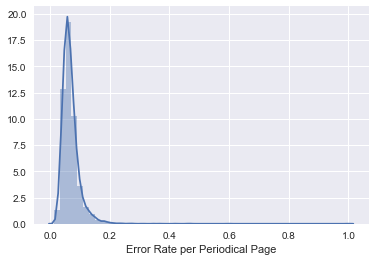

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16475),
 ('w', 15028),
 ('-', 11131),
 ('m', 10841),
 ('g', 10509),
 ('f', 7254),
 ('r', 6545),
 ('d', 6472),
 ('con-', 5882),
 ('re-', 5628),
 ("'", 4858),
 ('in-', 4460),
 ('t', 4327),
 ('tion', 3837),
 ('n', 3078),
 ('be-', 2889),
 ('ence', 2373),
 ('de-', 2340),
 ('ex-', 2282),
 ('com-', 2165),
 ('ference', 2030),
 ('confer-', 1979),
 ('en-', 1977),
 ('ment', 1788),
 ('ad-', 1723),
 ('th', 1467),
 ('meet-', 1456),
 ('mis-', 1436),
 ('un-', 1350),
 ('at-', 1246),
 ('ac-', 1173),
 ('tions', 1149),
 ('peo-', 1121),
 ('sab-', 1094),
 ('an-', 1083),
 ('ple', 1077),
 ('ers', 1076),
 ('pre-', 1061),
 ('ber', 1036),
 ('pro-', 1031),
 ('dis-', 1004),
 ('per-', 958),
 ('im-', 930),
 ('ap-', 904),
 ('mem-', 892),
 ('sionary', 876),
 ('pa-', 848),
 ('cali-', 828),
 ('fornia', 805),
 ('x', 789)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction2

Average verified rate: 0.9641692120819102

Average of error rates: 0.038859250516376516

Total token count: 6513672



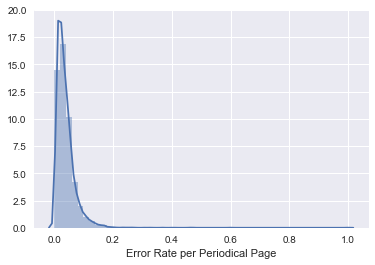

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16460),
 ('w', 15026),
 ('-', 11004),
 ('m', 10832),
 ('g', 10505),
 ('f', 7240),
 ('r', 6538),
 ('d', 6466),
 ("'", 4858),
 ('t', 4307),
 ('n', 3075),
 ('th', 1467),
 ('x', 788),
 ('inter-mountain', 682),
 ('k', 682),
 ('tion', 630),
 ('u', 561),
 ('re-', 429),
 ("'the", 419),
 ('ords', 405),
 ('ence', 395),
 ('co', 364),
 ('con-', 354),
 ('seventhday', 343),
 ('--', 327),
 ('california-nevada', 322),
 ('ment', 308),
 ('ference', 306),
 ('money-orders', 304),
 ('sabbathschool', 292),
 ('in-', 284),
 ('verah', 257),
 ('-the', 249),
 ('wm', 242),
 ("canvassers'", 228),
 ('ber', 226),
 ('ers', 223),
 ('pepperwood', 223),
 ('twenty-cent-a-week', 219),
 ("'s", 202),
 ('z', 194),
 ('ple', 194),
 ('by-laws', 193),
 ('camp-ground', 190),
 ("the'", 189),
 ('oo', 184),
 ('io', 181),
 ('-a', 175),
 ("''", 172),
 ('be-', 169)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19010801-V01-01-page1.txt: [('-THEN', 'THEN'), ('knowl-', 'knowl'), ('-', ''), ('-soul', 'soul'), ('mis-', 'mis'), ('-a', 'a'), ('-heart', 'heart')]
PUR19010801-V01-01-page10.txt: [('corre-', 'corre'), ('church-', 'church'), ('HEALDS-', 'HEALDS'), ('RE-', 'RE'), ('Healds-', 'Healds')]
PUR19010801-V01-01-page11.txt: [('MIS-', 'MIS')]
PUR19010801-V01-01-page13.txt: [('con-', 'con')]
PUR19010801-V01-01-page14.txt: [('Valley-', 'Valley'), ('Tra-', 'Tra')]
PUR19010801-V01-01-page15.txt: [('-', ''), ('Os-', 'Os'), ('-', ''), ('can-', 'can')]
PUR19010801-V01-01-page16.txt: [('-', ''), ('SEVENTH-', 'SEVENTH'), ('Wat-', 'Wat'), ('-for', 'for'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', '')]
PUR19010801-V01-01-page2.txt: [('being-', 'being'), ('-', ''), ('-', ''), ('-', '')]
PUR19010801-V01-01-page3.txt: [('p-', 'p'), ('-', ''), ('-', ''), ('an-', 'an')]
PUR19010801-V01-01-page4.txt: [('---', '--'), ('-', ''), ('-I', 'I')]
PUR19010801-V01-01

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction3

Average verified rate: 0.9690509552109996

Average of error rates: 0.03357273532015344

Total token count: 6525888



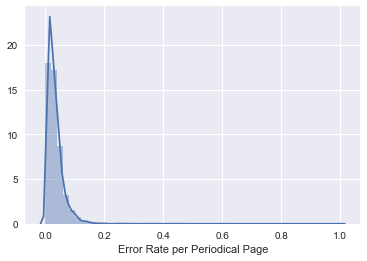

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16622),
 ('w', 15057),
 ('m', 10895),
 ('g', 10535),
 ('f', 7294),
 ('r', 6630),
 ('d', 6494),
 ("'", 4979),
 ('t', 4426),
 ('n', 3127),
 ('th', 1481),
 ('x', 808),
 ('k', 691),
 ('re', 675),
 ('tion', 635),
 ('co', 590),
 ('u', 585),
 ("'the", 419),
 ('ords', 405),
 ('ence', 396),
 ('seventhday', 345),
 ('ment', 308),
 ('ference', 306),
 ('sabbathschool', 293),
 ('inter-mountain', 276),
 ('ex', 260),
 ('verah', 258),
 ('wm', 242),
 ("canvassers'", 229),
 ('ber', 228),
 ('ers', 224),
 ('pepperwood', 223),
 ('un', 214),
 ("'s", 203),
 ('z', 203),
 ('lb', 195),
 ('ple', 195),
 ("the'", 191),
 ('pa', 188),
 ('oo', 186),
 ('io', 181),
 ("''", 175),
 ('ly', 170),
 ('twentyfifth', 168),
 ('sionary', 165),
 ("'of", 163),
 ('mis', 160),
 ('al', 159),
 ('tions', 154),
 ("bookmen's", 153)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19010801-V01-01-page1.txt: [("'Christ.", 'Christ.'), ("'of", 'of')]
PUR19010801-V01-01-page11.txt: [("'also.", 'also.')]
PUR19010801-V01-01-page12.txt: [("'I'.", 'I.')]
PUR19010801-V01-01-page14.txt: [("'Sacramento", 'Sacramento')]
PUR19010801-V01-01-page15.txt: [("'Thurston", 'Thurston'), ("'borne", 'borne')]
PUR19010801-V01-01-page16.txt: [("'just", 'just')]
PUR19010801-V01-01-page2.txt: [("'All", 'All'), ("'stand", 'stand')]
PUR19010801-V01-01-page3.txt: [("'Cursed", 'Cursed'), ("'is", 'is'), ("'t", 't')]
PUR19010801-V01-01-page4.txt: [("'There", 'There'), ("'Three", 'Three')]
PUR19010801-V01-01-page8.txt: [("'Advent", 'Advent'), ("'by", 'by')]
PUR19010815-V01-02-page1.txt: [("'is", 'is'), ("'a", 'a'), ("'same", 'same'), ("'be", 'be'), ("'to", 'to'), ("'Ye", 'Ye'), ("'they", 'they'), ("'do", 'do')]
PUR19010815-V01-02-page13.txt: [("'before.", 'before.')]
PUR19010815-V01-02-page15.txt: [("'F.", 'F.')]
PUR19010815-V01-02-page16.txt: [("'Daniel", 'Daniel')]
PUR19010815-V01-02-page2.

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction4

Average verified rate: 0.9701592452818625

Average of error rates: 0.032458542342874

Total token count: 6526410



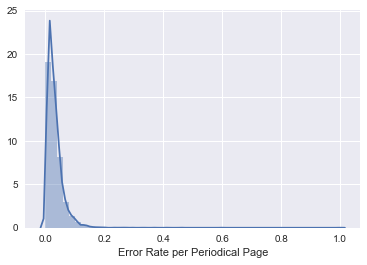

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16628),
 ('w', 15069),
 ('m', 10905),
 ('g', 10538),
 ('f', 7305),
 ('r', 6635),
 ('d', 6503),
 ("'", 4848),
 ('t', 4462),
 ('n', 3139),
 ('th', 1483),
 ('x', 809),
 ('k', 691),
 ('re', 677),
 ('tion', 635),
 ('co', 596),
 ('u', 586),
 ('ords', 406),
 ('ence', 397),
 ('seventhday', 345),
 ('ment', 308),
 ('ference', 306),
 ('sabbathschool', 293),
 ('inter-mountain', 276),
 ('ex', 260),
 ('verah', 258),
 ('wm', 242),
 ("canvassers'", 229),
 ('ber', 228),
 ('ers', 224),
 ('pepperwood', 223),
 ('un', 214),
 ('z', 204),
 ('lb', 195),
 ('ple', 195),
 ('pa', 194),
 ("the'", 189),
 ('oo', 186),
 ('io', 181),
 ('ly', 170),
 ('twentyfifth', 168),
 ("''", 165),
 ('sionary', 165),
 ('al', 162),
 ('mis', 160),
 ('tions', 154),
 ('mo', 149),
 ("bookmen's", 149),
 ("colporteurs'", 144),
 ('ft', 144)]

## Correction 5 -- Rejoin Split Words

In [25]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19010801-V01-01-page10.txt: [('HEALDS', 'BURG'), ('RE', 'CORDER')]
PUR19010801-V01-01-page11.txt: [('MIS', 'SIONARY')]
PUR19010801-V01-01-page14.txt: [('Wilk', 'eson'), ('Tra', 'ver')]
PUR19010801-V01-01-page15.txt: [('Os', 'borne')]
PUR19010815-V01-02-page12.txt: [('artifi', 'cial')]
PUR19010815-V01-02-page15.txt: [('SU', 'PERINTENDENTS')]
PUR19010829-V01-03-page1.txt: [('te', 't')]
PUR19010829-V01-03-page7.txt: [('ro', 'C')]
PUR19010912-V01-04-page2.txt: [('WOME', 'n')]
PUR19010912-V01-04-page3.txt: [('Ex', 'ecutive')]
PUR19010912-V01-04-page6.txt: [('ren', 'in')]
PUR19010926-V01-05-page1.txt: [('mis', 'takes')]
PUR19010926-V01-05-page12.txt: [('fo', 'r')]
PUR19011024-V01-07-page12.txt: [('Cre', 'We')]
PUR19011024-V01-07-page13.txt: [('ASSOCIA', 'TION')]
PUR19011024-V01-07-page14.txt: [('Co', 'D')]
PUR19011024-V01-07-page15.txt: [('CORRE', 'SPONDENCE')]
PUR19011107-V01-08-page12.txt: [('WI', 'Z'), ('CORRE', 'SPONDENCE'), ('CO', 'in')]
PUR19011107-V01-08-page8.txt: [('RECOR', 'DER'

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction5

Average verified rate: 0.9703877174581359

Average of error rates: 0.03216701091767483

Total token count: 6525164



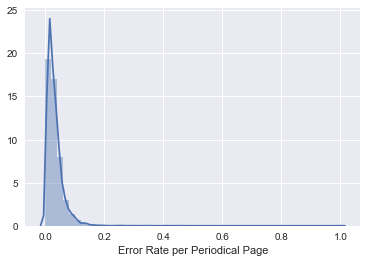

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16606),
 ('w', 15066),
 ('m', 10905),
 ('g', 10531),
 ('f', 7300),
 ('r', 6621),
 ('d', 6495),
 ("'", 4848),
 ('t', 4448),
 ('n', 3118),
 ('th', 1462),
 ('x', 808),
 ('k', 690),
 ('tion', 620),
 ('u', 585),
 ('re', 457),
 ('ords', 406),
 ('ence', 397),
 ('co', 396),
 ('seventhday', 345),
 ('ference', 306),
 ('ment', 304),
 ('sabbathschool', 293),
 ('inter-mountain', 276),
 ('verah', 258),
 ('ex', 246),
 ('wm', 242),
 ("canvassers'", 229),
 ('pepperwood', 223),
 ('ers', 222),
 ('ber', 220),
 ('z', 203),
 ('lb', 195),
 ("the'", 189),
 ('oo', 186),
 ('ple', 185),
 ('io', 181),
 ('ly', 169),
 ('twentyfifth', 168),
 ("''", 165),
 ('sionary', 161),
 ('pa', 154),
 ('al', 151),
 ('tions', 150),
 ('mis', 149),
 ("bookmen's", 149),
 ('mo', 146),
 ('un', 145),
 ("colporteurs'", 144),
 ('ft', 142)]

## Correction 6 -- Rejoin Split Words II

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19010801-V01-01-page14.txt: [('o', 'ro'), ('Tra', 'ver')]
PUR19010801-V01-01-page4.txt: [('tin', 'es')]
PUR19010815-V01-02-page9.txt: [('con', 'stantly')]
PUR19010829-V01-03-page1.txt: [('pe', 'culiar')]
PUR19010829-V01-03-page2.txt: [('to', 'co')]
PUR19010829-V01-03-page4.txt: [('CONFER', 'ENCE')]
PUR19010912-V01-04-page12.txt: [('A', 'ND')]
PUR19010912-V01-04-page16.txt: [('MISSION', 'ARY')]
PUR19010912-V01-04-page3.txt: [('Ex', 'ecutive')]
PUR19010912-V01-04-page8.txt: [('l', 'ook')]
PUR19010926-V01-05-page16.txt: [('So', 'ciety'), ('a', 'nd'), ('Sep', 'tember'), ('prog', 'ress')]
PUR19010926-V01-05-page5.txt: [('LABOR', 'ERS')]
PUR19011010-V01-06-page3.txt: [('to', 're')]
PUR19011010-V01-06-page9.txt: [('of', 'fice')]
PUR19011024-V01-07-page9.txt: [('PER', 'SONAL')]
PUR19011107-V01-08-page12.txt: [('CO', 'CO')]
PUR19011107-V01-08-page15.txt: [('in', 'stitution')]
PUR19011107-V01-08-page4.txt: [('CON', 'FERENCE')]
PUR19011121-V01-09-page13.txt: [('in', 'teresting')]
PUR19011121-V

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction6

Average verified rate: 0.970513954178835

Average of error rates: 0.03202994983771024

Total token count: 6524103



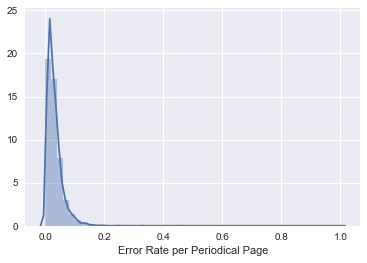

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16599),
 ('w', 15050),
 ('m', 10894),
 ('g', 10527),
 ('f', 7287),
 ('r', 6595),
 ('d', 6494),
 ("'", 4847),
 ('t', 4436),
 ('n', 3112),
 ('th', 1447),
 ('x', 808),
 ('k', 690),
 ('tion', 619),
 ('u', 579),
 ('ords', 406),
 ('co', 385),
 ('ence', 377),
 ('re', 359),
 ('seventhday', 345),
 ('sabbathschool', 293),
 ('ment', 284),
 ('ference', 278),
 ('inter-mountain', 276),
 ('verah', 258),
 ('ex', 246),
 ('wm', 242),
 ("canvassers'", 229),
 ('pepperwood', 223),
 ('ber', 212),
 ('ers', 204),
 ('z', 202),
 ('lb', 195),
 ("the'", 189),
 ('ple', 185),
 ('oo', 182),
 ('io', 181),
 ('twentyfifth', 168),
 ("''", 165),
 ('sionary', 161),
 ('ly', 158),
 ('pa', 154),
 ('tions', 150),
 ("bookmen's", 149),
 ('mo', 144),
 ("colporteurs'", 144),
 ('un', 144),
 ('ft', 138),
 ('al', 138),
 ('mt', 135)]

## Review Remaining Errors

In [31]:
GoH.reports.docs_with_high_error_rate(summary)

[('PUR19170607-V16-44-page28.txt', 1.0),
 ('PUR19170607-V16-44-page2.txt', 0.462),
 ('PUR19170607-V16-44-page32.txt', 0.414),
 ('PUR19130515-V12-42-page2.txt', 0.333),
 ('PUR19150311-V14-32-page13.txt', 0.329),
 ('PUR19110302-V10-31-page10.txt', 0.295),
 ('PUR19020213-V01-15-page18.txt', 0.273),
 ('PUR19200226-V19-28-page1.txt', 0.257),
 ('PUR19170607-V16-44-page1.txt', 0.25),
 ('PUR19170607-V16-44-page4.txt', 0.241),
 ('PUR19050427-V04-40-page7.txt', 0.239),
 ('PUR19040324-V03-17-page15.txt', 0.213),
 ('PUR19200729-V19-50-page7.txt', 0.201),
 ('PUR19170607-V16-44-page24.txt', 0.201)]

In [32]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.3]

GoH.utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

PUR19170607-V16-44-page28.txt

PUR19170607-V16-44-page2.txt

PUR19170607-V16-44-page32.txt

PUR19130515-V12-42-page2.txt

PUR19150311-V14-32-page13.txt



In [35]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['demartelectifisimreiftttheit',
  'forcertification',
  'itwasagreathelptotheworkto',
  'maniannouncement',
  'businessiprovided',
  'properlyselected',
  'weniger-connelly',
  'cornercoltonavenueboulevardand',
  'interest-bearing',
  "gtepping-storles''ette",
  'intelligent-looking',
  'publishednreekly',
  'becomeinterested',
  'presumetheyhavealsobeenwidelycirculated',
  'itssigniacancoreally',
  "god's'-inessetigers",
  "stteeess'fttl-field",
  'opportunity-that',
  'interestingeditorials',
  'student-teachers',
  'ofthechurchesofthedifferenttpetsdid',
  'heartwillingness',
  'stiperintendetit',
  'noncombatligious',
  'umeombilliniellamonelligralgaliamme',
  "clfnaaiiy'ihktturs",
  'thirtyprayer-meeting',
  'fellow-believers',
  'conferappreciate',
  'experiprincipals',
  'receipt-certificates',
  'manconscientiously',
  'gaimmdllimmombit',
  'expected--failed',
  'publishing-houses',
  'reunconstitutional',
  'publishsubscribers',
  'establishdepartment',
  'seventh-dayadventis

## Correction 7 -- Remove long error tokens

In [37]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m|M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "e|E"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "l|L"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i|I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "f|F"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19080917-V08-07-page6.txt: [('IIIIMMONimmitrisumminel', ' ')]
PUR19140625-V13-47-page1.txt: [('NNeeceeeeciseee', ' ')]
PUR19140702-V13-48-page1.txt: [('MMMMMMMMMMMMMMMMMMM', ' ')]
PUR19150513-V14-40-page3.txt: [('vviissiittiing', ' ')]
PUR19170607-V16-44-page31.txt: [('iiiiiiiiiiiiinniliiiillanitiliniiiIIIHIIIII', ' '), ('PIIINIIIIIIidIMIDTMIld', ' ')]
PUR19170830-V17-04-page8.txt: [('ploommulimmmiltlammatillp', ' ')]
PUR19170927-V17-08-page8.txt: [('SplammoliginmonnammommUltetillin', ' ')]
PUR19171004-V17-09-page1.txt: [('anasseamosmooffillnliffimomplffidnalinenellfttlefammemetjfiflinimmmmal', ' ')]
PUR19171018-V17-11-page1.txt: [('ftlifillownealflammoolaWallimmomell.mmemliffiernftgoommetimalimonfismumlie.', ' '), ('ftlifillownealflammoolaWallimmomell.mmemliffiernftgoommetimalimonfismumlie.', ' ')]
PUR19171115-V17-15-page8.txt: [('Umeombilliniellamonelligralgaliamme', ' ')]
PUR19190417-V18-37-page3.txt: [('trommammoom.m...mm', ' ')]
PUR19200506-V19-38-page8.txt: [('IEEEEEEEEETEEEEE

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction7

Average verified rate: 0.9705169293523703

Average of error rates: 0.0320264089701977

Total token count: 6524083



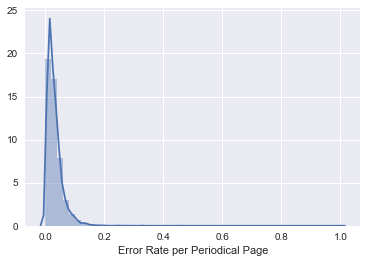

In [40]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [41]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16599),
 ('w', 15050),
 ('m', 10893),
 ('g', 10527),
 ('f', 7287),
 ('r', 6595),
 ('d', 6494),
 ("'", 4847),
 ('t', 4436),
 ('n', 3112),
 ('th', 1447),
 ('x', 808),
 ('k', 690),
 ('tion', 619),
 ('u', 579),
 ('ords', 406),
 ('co', 385),
 ('ence', 377),
 ('re', 359),
 ('seventhday', 345),
 ('sabbathschool', 293),
 ('ment', 284),
 ('ference', 278),
 ('inter-mountain', 276),
 ('verah', 258),
 ('ex', 246),
 ('wm', 242),
 ("canvassers'", 229),
 ('pepperwood', 223),
 ('ber', 212),
 ('ers', 204),
 ('z', 202),
 ('lb', 195),
 ("the'", 189),
 ('ple', 185),
 ('oo', 182),
 ('io', 181),
 ('twentyfifth', 168),
 ("''", 165),
 ('sionary', 161),
 ('ly', 158),
 ('pa', 154),
 ('tions', 150),
 ("bookmen's", 149),
 ('mo', 144),
 ("colporteurs'", 144),
 ('un', 144),
 ('ft', 138),
 ('al', 138),
 ('mt', 135)]

## Correction 8 -- Separate Squashed Words

In [43]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PUR19010801-V01-01-page1.txt: [('sanetifiedAclgtrient', 's a net if i ed A c l g t r i e n t')]
PUR19010829-V01-03-page5.txt: [('commandmentkeepers', 'commandment keepers')]
PUR19011107-V01-08-page13.txt: [('commandmentkeeping', 'commandment keeping')]
PUR19011121-V01-09-page16.txt: [('regularlyrecurring', 'regularly recurring')]
PUR19011205-V01-10-page1.txt: [('thoroughlyconverted', 'thoroughly converted')]
PUR19020116-V01-13-page15.txt: [('Christianexperience', 'Christian experience')]
PUR19020116-V01-13-page16.txt: [('regularlyappointed', 'regularly appointed')]
PUR19020130-V01-14-page7.txt: [('Morgannevertheless', 'Morgan nevertheless')]
PUR19020213-V01-15-page20.txt: [('quicklyaccomplished', 'quickly accomplished')]
PUR19020313-V01-16-page1.txt: [('fellowaccountability', 'fellow accountability')]
PUR19020313-V01-16-page14.txt: [('conferresponsibility', 'confer responsibility')]
PUR19020410-V01-18-page6.txt: [('gorgeouslydecorated', 'gorgeous l y decorated')]
PUR19020619-V01-23-pag

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PUR/correction8

Average verified rate: 0.9705368861327659

Average of error rates: 0.03200280318678077

Total token count: 6525108



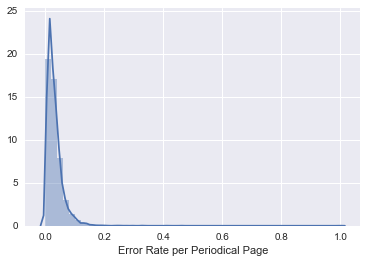

In [46]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [47]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('e', 16628),
 ('w', 15052),
 ('m', 10911),
 ('g', 10539),
 ('f', 7296),
 ('r', 6615),
 ('d', 6505),
 ("'", 4847),
 ('t', 4472),
 ('n', 3139),
 ('th', 1447),
 ('x', 809),
 ('k', 693),
 ('tion', 619),
 ('u', 588),
 ('ords', 406),
 ('co', 385),
 ('ence', 377),
 ('re', 359),
 ('seventhday', 345),
 ('sabbathschool', 293),
 ('ment', 284),
 ('ference', 278),
 ('inter-mountain', 276),
 ('verah', 258),
 ('ex', 246),
 ('wm', 242),
 ("canvassers'", 229),
 ('pepperwood', 223),
 ('ber', 212),
 ('ers', 204),
 ('z', 204),
 ('lb', 195),
 ("the'", 189),
 ('ple', 185),
 ('oo', 182),
 ('io', 181),
 ('twentyfifth', 168),
 ("''", 165),
 ('sionary', 161),
 ('ly', 158),
 ('pa', 154),
 ('tions', 150),
 ("bookmen's", 149),
 ('mo', 144),
 ("colporteurs'", 144),
 ('un', 144),
 ('ft', 138),
 ('al', 138),
 ('mt', 135)]